# Part I Exploration Title)
## by (Mulukal Aneley)

## Introduction
> Introduce the dataset

>This document explores a dataset containing the trip data of the ford gobike approximately 183,412 with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are 9 numerical, and others are 2 datetime, 4 object type and 1 is boolean type.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902A-fordgobike-tripdata.csv')
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# check for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# duration_sec summary statistics
pd.set_option('float_format', '{:f}'.format)
df.duration_sec.describe()

count   183412.000000
mean       726.078435
std       1794.389780
min         61.000000
25%        325.000000
50%        514.000000
75%        796.000000
max      85444.000000
Name: duration_sec, dtype: float64

In [10]:
# number of unique bikes
df.bike_id.nunique()

4646

In [11]:
# number of unique start stations
df.start_station_name.nunique()

329

### Clean

##### Define

Drop (bike_share_for_all_trip, rental_access_method, start_station_id, end_station_id, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude).

#### Code

In [12]:
df.drop(['bike_share_for_all_trip', 'start_station_id', 'end_station_id',
              'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 
               'end_station_longitude'], axis=1, inplace=True)

##### Test

In [13]:
list(df.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender']

##### Define

Convert (start_time, end_time) to datetime data type, (bike_id) to object/string data type, and (user_type) to categorical data type.

##### code

In [14]:
# to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# to object/string
df.bike_id = df.bike_id.astype('str')

# to category
df.user_type = df.user_type.astype('category')

In [15]:
df.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
end_station_name              object
bike_id                       object
user_type                   category
member_birth_year            float64
member_gender                 object
dtype: object

### What is the structure of your dataset?

> There are 183,412 data trips for fordgobike in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, and so on
### What is/are the main feature(s) of interest in your dataset?

> > I'm most interested in figuring out how trip duration is dependent on other features such as: age, start station, end station, user type, and gender from the dataset.

>user_type, to find the differences in bikes usage between subscribers and customers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All remaining features, since not neeeded columns were dropped during the cleaning process.

## Univariate Exploration




I'll start by looking at the distribution of the main variable of interest: start_hours.

##### start_Hours

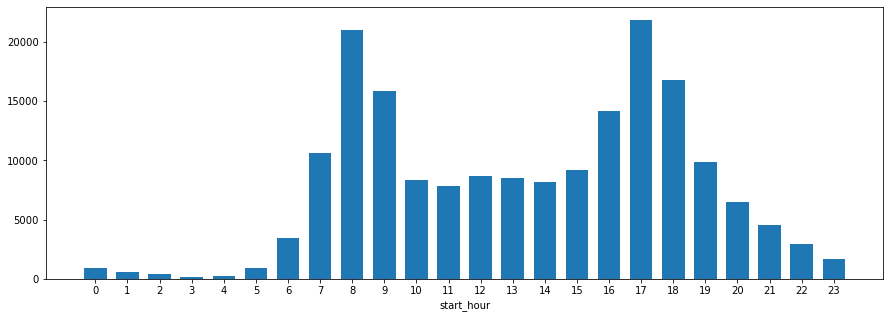

In [47]:
# plot a histogram with gaps between bars
plt.figure(figsize=[15,5])
bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.hist(data = df, x = 'start_hour', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel('start_hour');

We can see that the distribution is roughly bimodal (has two peaks) at 8 and 17. This might be because most work days start and end around this time.

#### Duration_Sec

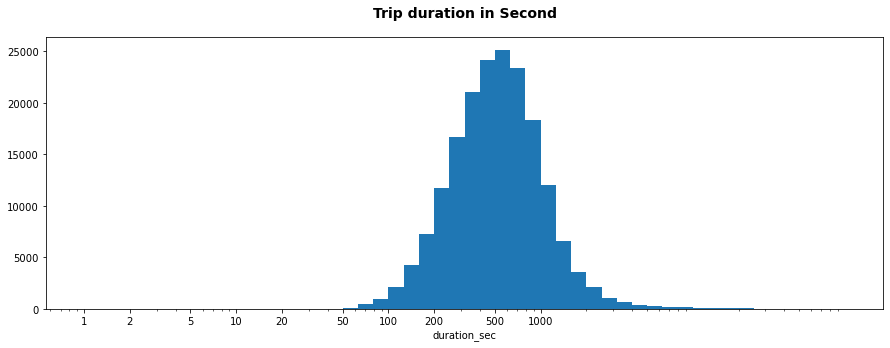

In [45]:
# plot a histogram with logarithmic scale transformation

plt.figure(figsize=[15,5])
bin_edges = 10 ** np.arange(0.0, np.log10(df.duration_sec.max())+0.1, 0.1)
plt.title('Trip duration in Second' , y=1.05, fontsize=14, fontweight='bold')
plt.hist(data = df, x = 'duration_sec', bins = bin_edges)
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('duration_sec');

We can see from the histogram that most rides took about 480-720 seconds. And very few rides lasted more than one hour (3600 seconds)

In [17]:
# new useful columns

# from start_time
df['start_month'] = df.start_time.dt.month
df['start_weekday'] = df.start_time.dt.weekday 
df['start_hour'] = df.start_time.dt.hour

# from end_time
df['end_hour'] = df.end_time.dt.hour

# from duration_sec
df['duration_minutes'] = df['duration_sec']/60

df.insert(4, 'start_day' , df['start_time'].dt.day_name())
df.insert(6, 'end_day' , df['start_time'].dt.day_name())



# test
df.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
start_day                     object
end_station_name              object
end_day                       object
bike_id                       object
user_type                   category
member_birth_year            float64
member_gender                 object
start_month                    int64
start_weekday                  int64
start_hour                     int64
end_hour                       int64
duration_minutes             float64
dtype: object

In [19]:
# labels to use in plots
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# color to use in plots 
base_color = sb.color_palette()[0]

# from duration_sec
df['duration_minutes'] = df['duration_sec']/60

#### User_Type

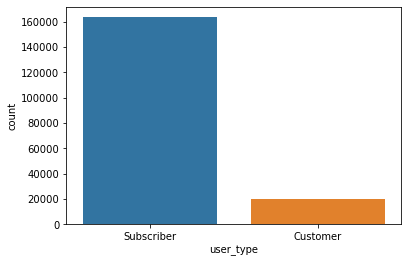

In [49]:
# plot a bar chart
user_cat_order = df['user_type'].value_counts().index
sb.countplot(data = df, x = 'user_type', order = user_cat_order);

It's pretty clear, most rides  were made by subscribers.

##### Gender Distribution

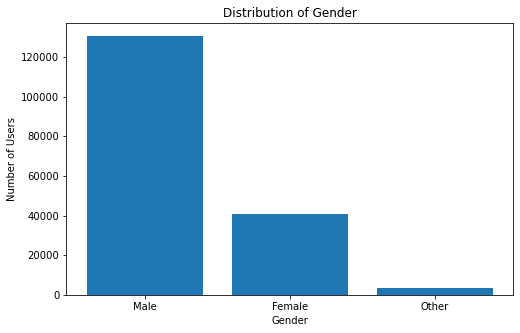

In [3]:
# plotting genders 
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

Here it shows male are the more users

##### start_station_name

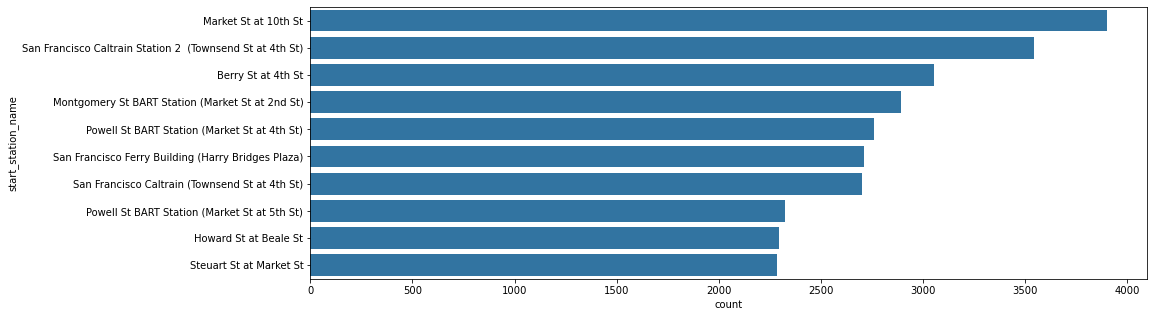

In [51]:
# plot a horizontal bar chart
cat_order = df['start_station_name'].value_counts().index[:10]
plt.figure(figsize=[15,5])
# color to use in plots 
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'start_station_name', color = base_color, order = cat_order);

We can see that (Market St at 10th St)  was the most common start stations.

##### Number of bike started each day

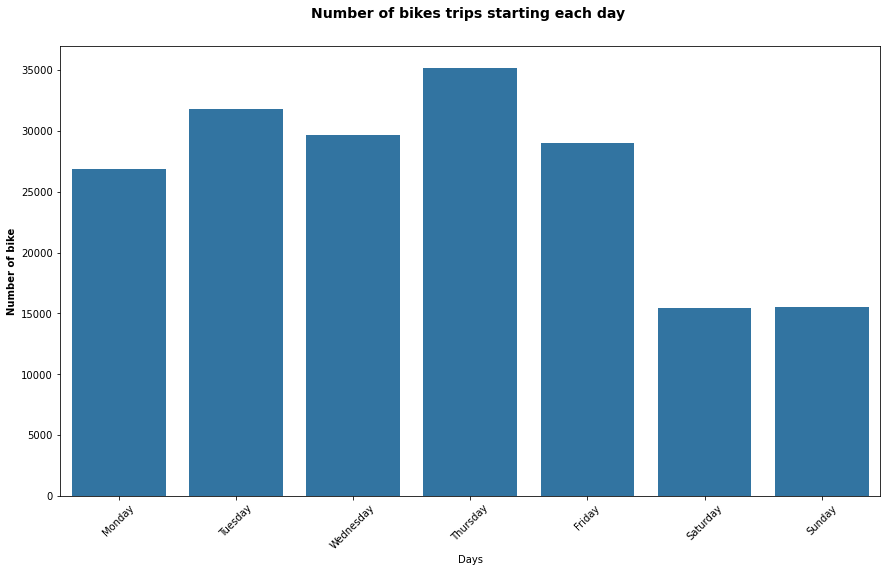

In [29]:
plt.figure(figsize=[14.70, 8.27])
startday_order = df['start_day'].value_counts().index
sb.countplot(data = df, x = 'start_day' , color = base_color, order =  ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Number of bikes trips starting each day ' , y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('Number of bike' , fontweight='bold')
plt.xlabel('Days')
plt.xticks(rotation = 45);

More bike trips were started on Thursday 

##### Number of bike ending each day

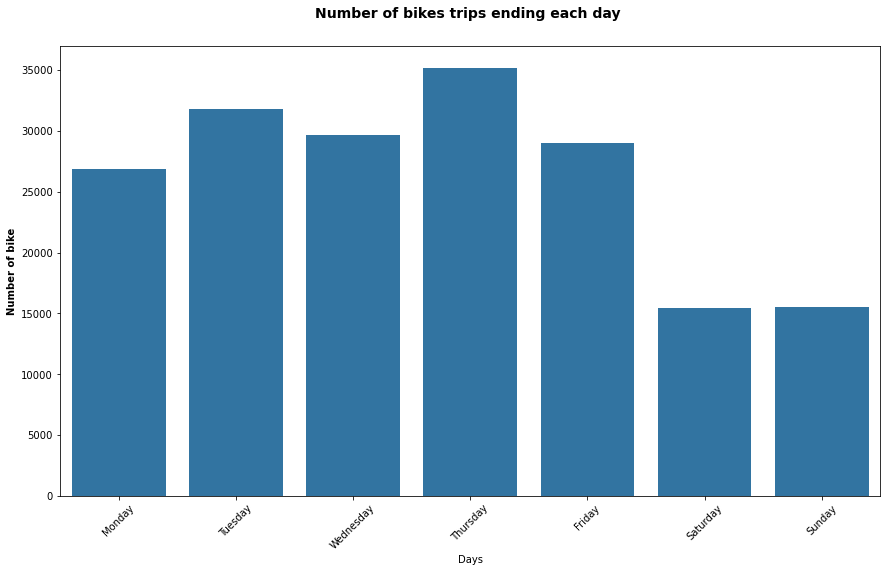

In [30]:
plt.figure(figsize=[14.70, 8.27])
startday_order = df['end_day'].value_counts().index
sb.countplot(data = df, x = 'end_day' , color = base_color ,order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Number of bikes trips ending each day ' , y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('Number of bike' , fontweight='bold')
plt.xlabel('Days')
plt.xticks(rotation = 45);

Most trips are taken on thursday

##### start_weekday

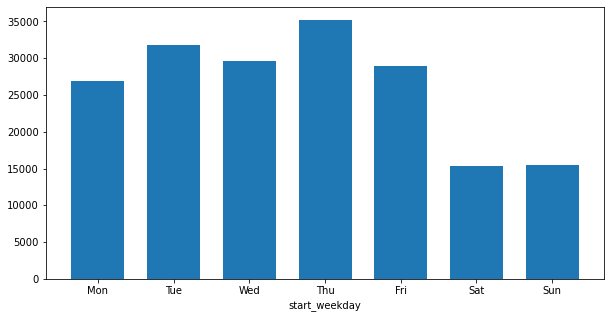

In [25]:
# plot a histogram with gaps between bars
plt.figure(figsize=[10,5])
bin_edges = np.arange(-0.5, 6.5+1, 1)
plt.hist(data = df, x = 'start_weekday', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.xlabel('start_weekday');

bikes were mostly used on work days (Monday-Friday) mainly on thursday and tuesday

##### Members_birth_year

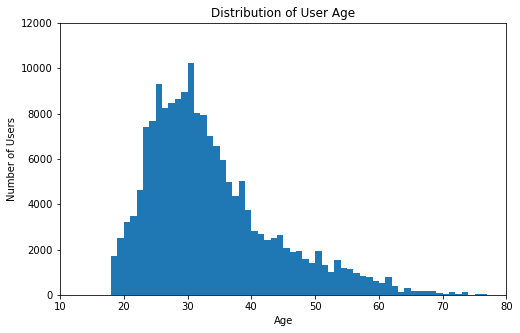

In [26]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

you can see that the distribution is more concentrated between 20 to 40 years old.

##### Bike_id



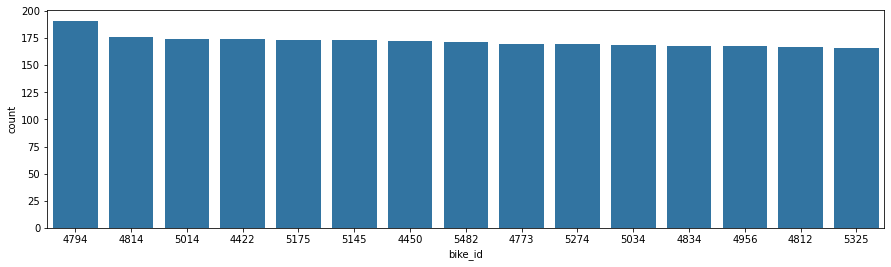

In [27]:
# plot a bar chart
cat_order = df['bike_id'].value_counts().index[:15]
plt.figure(figsize=[15,4])
sb.countplot(data = df, x = 'bike_id', color = base_color, order = cat_order);

maximum number of uses for a single bike was around 880.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We can see from the histogram that most rides took about 480-720 seconds. And very few rides lasted more than one hour (3600 seconds)
> maximum number of uses for a single bike was around 880.

> The distribution is more concentrated between 20 to 40 years old.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Additional columns are created such as

>  start_month: 
  start_weekday: 
  start_hour: 
  end_hour: 
  duration_minutes:

## Bivariate Exploration



#### duration_minutes Vs user_type

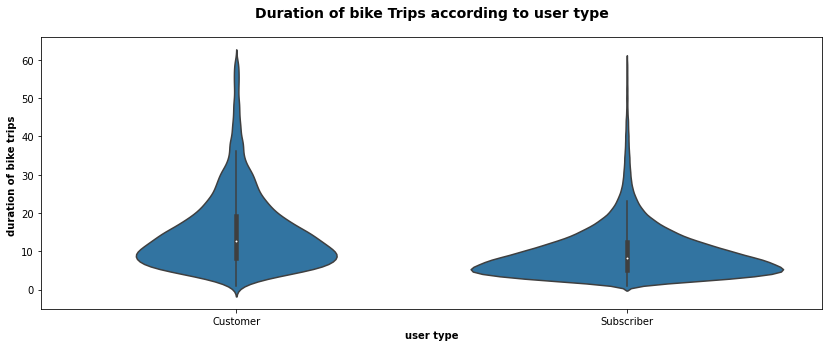

In [56]:
plt.figure(figsize=[14,5])
sb.violinplot(data = df.query("duration_minutes <= 60"),x = 'user_type' ,y='duration_minutes' ,color = sb.color_palette()[0])
plt.title('Duration of bike Trips according to user type', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('user type' , fontweight='bold')
plt.ylabel('duration of bike trips ' , fontweight='bold');

at duration of les than or equal to 60 minutes both customers and subscribers have achieved similarduration of use 

##### user_type vs. start_weekday

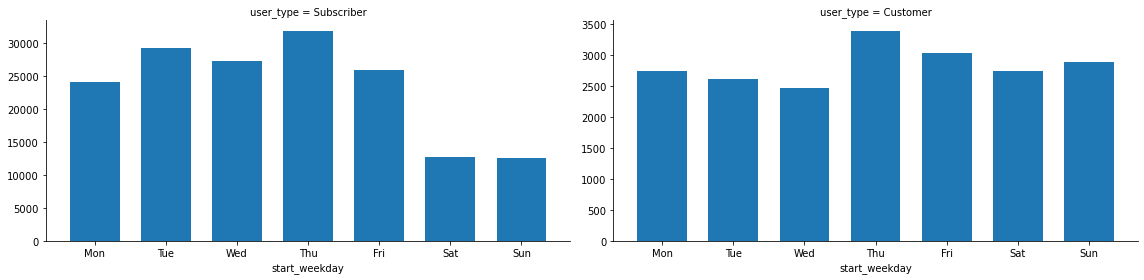

In [57]:
# facetting histograms of start_weekday against user_type
bin_edges = np.arange(-0.5, 6.5+1, 1)
g = sb.FacetGrid(data = df, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
g.map(plt.hist, 'start_weekday', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 6+1, 1), weekday_labels);

Subscribers mostly used bikes on workdays (Monday - Friday), while customers bikes usage was about the same for the whole week with a slight increment on Friday and Saturday.

#### User_type and start_hour

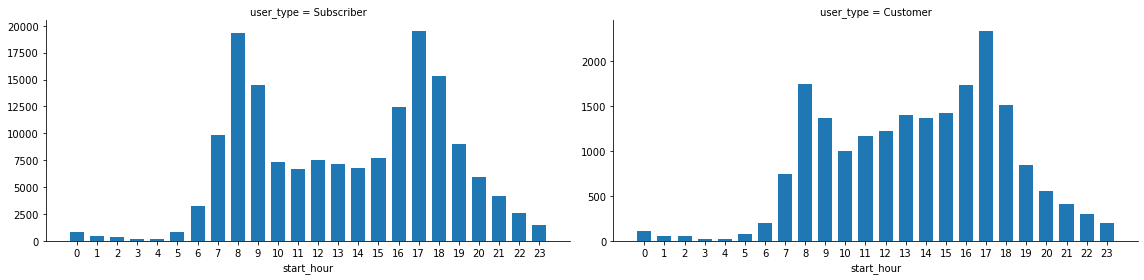

In [58]:
# facetting histograms of start_hour against user_type
bin_edges = np.arange(-0.5, 23.5+1, 1)
g = sb.FacetGrid(data = df, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
g.map(plt.hist, 'start_hour', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 23+1, 1));

Most rides for subscribers started at 8 or 17. While most customer rides started at 17 

##### Trip Duration and gender 

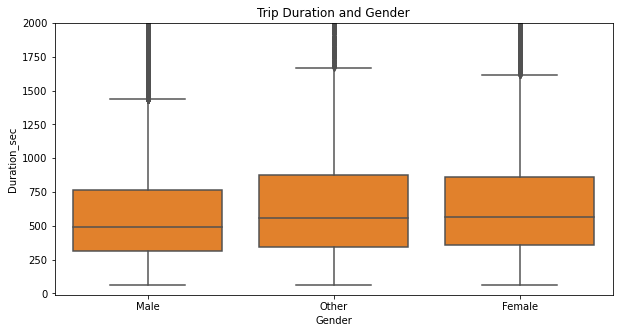

In [59]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

nterestingly, we can see that higher percentage of female and other rides longer trips then males although number of male riders are very high then other and female.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> At duration of less than or equal to 60 minutes both customers and subscribers have achieved similarduration of use and also Subscribers mostly used bikes on workdays (Monday - Friday), while customers bikes usage was about the same for the whole week with a slight increment on Friday and Saturday.interestingly, we can see that higher percentage of female and other rides longer trips then males although number of male riders are very high then other and female.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> interestingly, we can see that higher percentage of female and other rides longer trips then males although number of male riders are very high then other and female.

## Multivariate Exploration



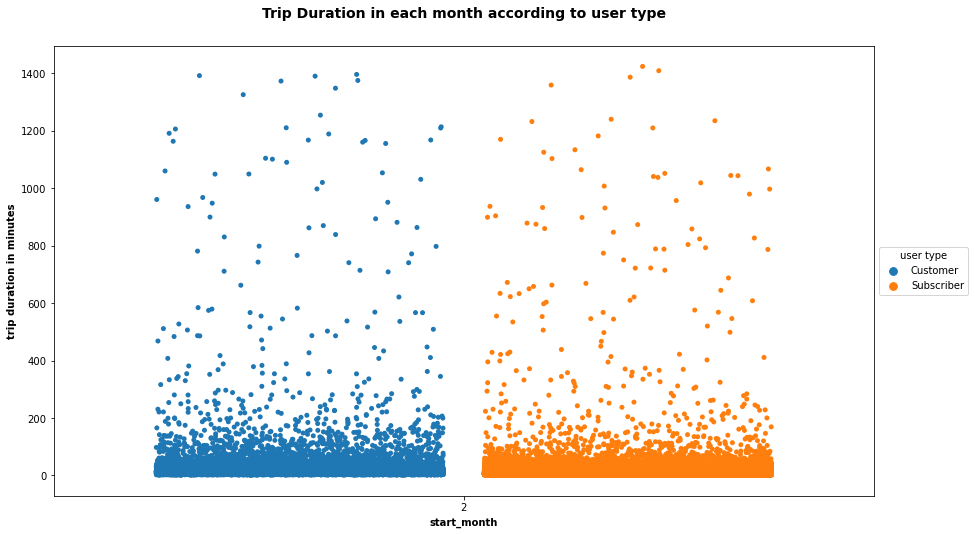

In [60]:
plt.figure(figsize=[14.7, 8.27])
sb.stripplot(data = df, x = 'start_month' , y = 'duration_minutes' , hue = 'user_type' ,
             jitter = 0.35, dodge = True )
plt.legend(loc= 'center left' , bbox_to_anchor = (1, 0.5), title = 'user type')
plt.title('Trip Duration in each month according to user type' , y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('start_month' , fontweight='bold')
plt.ylabel('trip duration in minutes'  , fontweight='bold');  

when we viewed by month with out setting a duration limit , the plot shows that both customers and subscribers had approximatly longer trip duration 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> when we viewed by month with out setting a duration limit , the plot shows that both customers and subscribers had approximatly longer trip duration

### Were there any interesting or surprising interactions between features?

> NO

## Conclusions

at duration of les than or equal to 60 minutes both customers and subscribers have achieved similarduration of use and also Subscribers mostly used bikes on workdays (Monday - Friday), while customers bikes usage was about the same for the whole week with a slight increment on Friday and Saturday.interestingly, we can see that higher percentage of female and other rides longer trips then males although number of male riders are very high then other and female.

